##범위선도(Range Forward)
범위선도(Range Forward)는 옵션 거래에서 사용되는 전략으로, 일정 범위 내에서 선도 계약을 체결하는 것을 의미합니다. 이는 환율 변동성 관리에 특히 유용하며, 특정 범위 내에서 가격을 고정시킴으로써 예측 가능한 환율을 유지하려는 목적이 있습니다. 이는 두 개의 선도 계약을 결합하여 일정 범위 내에서 환율을 고정하는 방식입니다.
##범위선도 구현
범위선도의 구현을 위해서는 두 개의 선도 계약을 사용하여 상한선(upper bound)과 하한선(lower bound)을 설정합니다. 예를 들어, 환율이 상한선을 초과하면 높은 가격에 팔고, 하한선 아래로 떨어지면 낮은 가격에 삽니다.

In [2]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


범위선도의 현재 가치: 0.0122


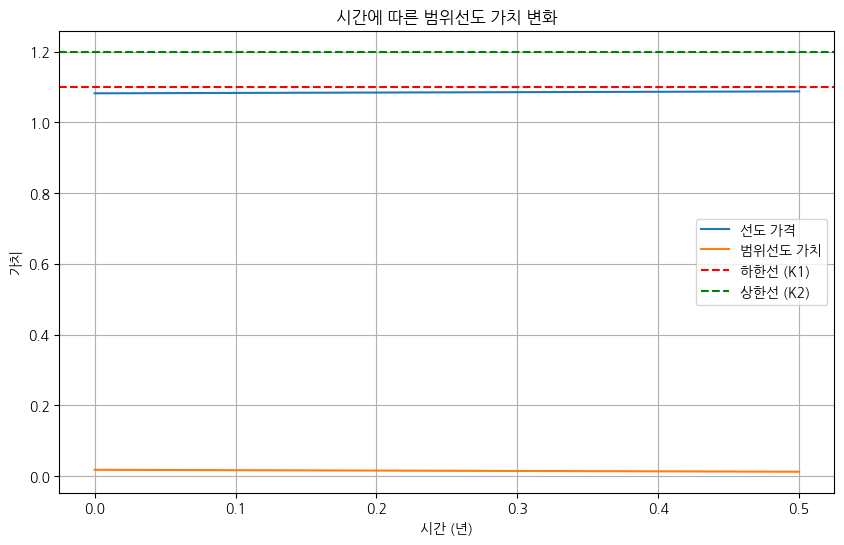

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 범위선도의 현재 가치 계산 함수
def range_forward_value(S, K1, K2, T, r):
    """

    S: 현재 기초 자산 가격
    K1: 하한선
    K2: 상한선
    T: 만기 시간 (년 단위)
    r: 무위험 이자율
    """
    # 현재 시간의 선도 가격 계산
    forward_price = S * np.exp(r * T)

    # 범위 내에서 선도 가격의 현재 가치 계산
    if forward_price < K1:
        value = K1 - forward_price
    elif forward_price > K2:
        value = forward_price - K2
    else:
        value = 0

    return value

# 실제 데이터 가져오기
# EUR/USD 환율 데이터
eurusd = yf.Ticker("EURUSD=X")
eurusd_data = eurusd.history(period="1y")
S = eurusd_data['Close'].values[-1]  # 현재 환율

# 기본 변수 설정
K1 = 1.10  # 하한선
K2 = 1.20  # 상한선
T = 0.5    # 만기 시간 (0.5년)
r = 0.01   # 무위험 이자율 (1%)

# 범위선도의 현재 가치 계산
range_forward_val = range_forward_value(S, K1, K2, T, r)
print(f"범위선도의 현재 가치: {range_forward_val:.4f}")

# 시각화
time_horizon = np.linspace(0, T, 100)
forward_prices = S * np.exp(r * time_horizon)
range_forward_values = [range_forward_value(S, K1, K2, t, r) for t in time_horizon]

plt.figure(figsize=(10, 6))
plt.plot(time_horizon, forward_prices, label='선도 가격')
plt.plot(time_horizon, range_forward_values, label='범위선도 가치')
plt.axhline(y=K1, color='r', linestyle='--', label='하한선 (K1)')
plt.axhline(y=K2, color='g', linestyle='--', label='상한선 (K2)')
plt.xlabel('시간 (년)')
plt.ylabel('가치')
plt.title('시간에 따른 범위선도 가치 변화')
plt.legend()
plt.grid(True)
plt.show()


하나의 선도 계약은 EUR/USD 환율을 대상으로 하고, 다른 하나는 금(Gold)의 선도 가격을 대상

EUR/USD 선도 계약의 현재 가치: -0.0123
Gold 선도 계약의 현재 가치: 614.7269


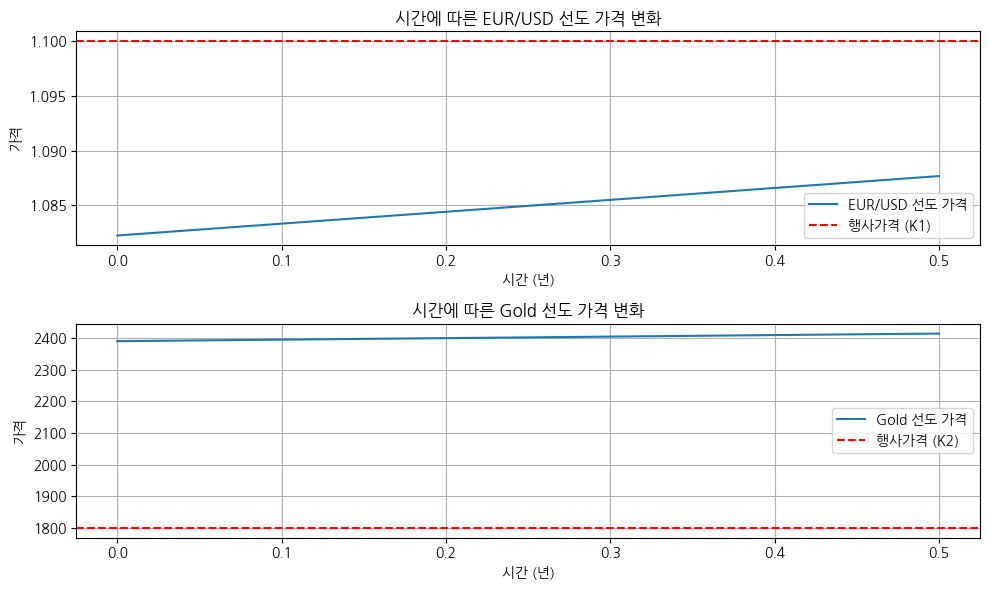

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 두 개의 선도 계약의 현재 가치 계산 함수
def dual_forward_value(S1, K1, S2, K2, T, r1, r2):
    """
    S1: 첫 번째 기초 자산의 현재 가격 (예: EUR/USD 환율)
    K1: 첫 번째 선도 계약의 행사가격
    S2: 두 번째 기초 자산의 현재 가격 (예: Gold 가격)
    K2: 두 번째 선도 계약의 행사가격
    T: 만기 시간 (년 단위)
    r1: 첫 번째 기초 자산의 무위험 이자율
    r2: 두 번째 기초 자산의 무위험 이자율
    """
    # 현재 시간의 선도 가격 계산
    forward_price1 = S1 * np.exp(r1 * T)
    forward_price2 = S2 * np.exp(r2 * T)

    # 두 선도 계약의 현재 가치 계산
    value1 = forward_price1 - K1
    value2 = forward_price2 - K2

    return value1, value2

# 실제 데이터 가져오기
# EUR/USD 환율 데이터
eurusd = yf.Ticker("EURUSD=X")
eurusd_data = eurusd.history(period="1y")
S1 = eurusd_data['Close'].values[-1]  # 현재 환율

# Gold 가격 데이터
gold = yf.Ticker("GC=F")
gold_data = gold.history(period="1y")
S2 = gold_data['Close'].values[-1]  # 현재 금 가격

# 기본 변수 설정
K1 = 1.10  # EUR/USD 선도 계약의 행사가격
K2 = 1800  # Gold 선도 계약의 행사가격
T = 0.5    # 만기 시간 (0.5년)
r1 = 0.01  # EUR/USD 무위험 이자율 (1%)
r2 = 0.02  # Gold 무위험 이자율 (2%)

# 두 선도 계약의 현재 가치 계산
value1, value2 = dual_forward_value(S1, K1, S2, K2, T, r1, r2)
print(f"EUR/USD 선도 계약의 현재 가치: {value1:.4f}")
print(f"Gold 선도 계약의 현재 가치: {value2:.4f}")

# 시각화
time_horizon = np.linspace(0, T, 100)
forward_prices1 = S1 * np.exp(r1 * time_horizon)
forward_prices2 = S2 * np.exp(r2 * time_horizon)
values1 = [dual_forward_value(S1, K1, S2, K2, t, r1, r2)[0] for t in time_horizon]
values2 = [dual_forward_value(S1, K1, S2, K2, t, r1, r2)[1] for t in time_horizon]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_horizon, forward_prices1, label='EUR/USD 선도 가격')
plt.axhline(y=K1, color='r', linestyle='--', label='행사가격 (K1)')
plt.xlabel('시간 (년)')
plt.ylabel('가격')
plt.title('시간에 따른 EUR/USD 선도 가격 변화')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_horizon, forward_prices2, label='Gold 선도 가격')
plt.axhline(y=K2, color='r', linestyle='--', label='행사가격 (K2)')
plt.xlabel('시간 (년)')
plt.ylabel('가격')
plt.title('시간에 따른 Gold 선도 가격 변화')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
